# <center>😀😐😭 Speech Emotion Detection 😭😐😀</center>

# <h1 id= 'imports'><span class="label label-default" style="background-color:#4FAEB0; font-size:20px">1. Imports</span></h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.io import wavfile
import os.path
import IPython.display
import seaborn as sns
import librosa
import librosa.display
import soundfile

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras import utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from keras import optimizers

import warnings

# <h1 id='load'><span class="label label-default" style="background-color:#4FAEB0; font-size:20px">2. Loading Data</span></h1>

In [3]:
image_dir = Path('../input/speech-emotion-recognition-en/Crema')

In [4]:
filepaths = list(image_dir.glob(r'**/*.wav'))

In [5]:
labels = list(map(lambda x: os.path.split(x)[1].split('_')[2], filepaths))

In [6]:
set(labels)

{'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD'}

These correspond to the emotions:

* ANG: Anger 😡
* DIS: Disgust 🤢
* FEA: Fear 😱
* HAP: Happiness 😀
* NEU: Neutral 😐
* SAD: Sadness 😭

In [7]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

audio_df = pd.concat([filepaths, labels], axis=1)
audio_df

,Filepath,Label
0,../input/speech-emotion-recognition-en/Crema/1...,DIS
1,../input/speech-emotion-recognition-en/Crema/1...,HAP
2,../input/speech-emotion-recognition-en/Crema/1...,HAP
3,../input/speech-emotion-recognition-en/Crema/1...,DIS
4,../input/speech-emotion-recognition-en/Crema/1...,DIS
...,...,...
7437,../input/speech-emotion-recognition-en/Crema/1...,ANG
7438,../input/speech-emotion-recognition-en/Crema/1...,ANG
7439,../input/speech-emotion-recognition-en/Crema/1...,ANG
7440,../input/speech-emotion-recognition-en/Crema/1...,SAD


# <h1 id='visual'><span class="label label-default" style="background-color:#4FAEB0; font-size:20px">3. Visualising Data</span></h1>

<AxesSubplot:xlabel='Label', ylabel='Count'>

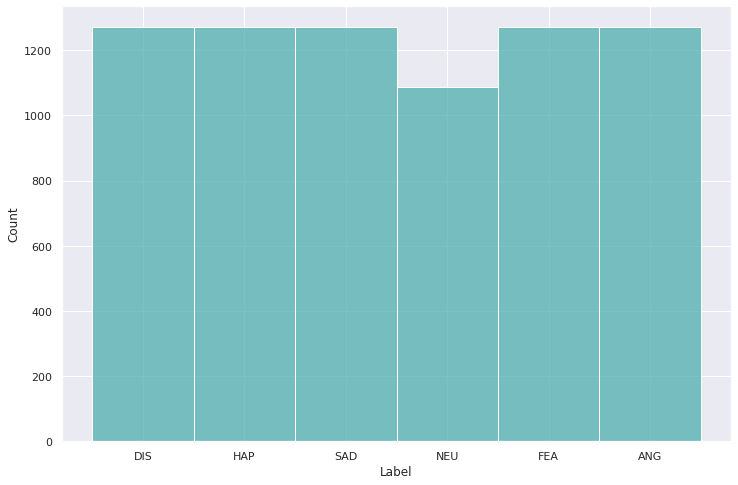

In [8]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('darkgrid')
sns.histplot(labels, color='#4FAEB0')

Same number of files for all emotions except neutral, but the difference is not significant enough to require the use of oversampling.

In [9]:
audio_arrays = []

for i in audio_df['Filepath']:
    x, sr = librosa.load(i, sr=44100)
    audio_arrays.append(x)
    
audio_df['Arrays'] = audio_arrays

In [10]:
audio_df

,Filepath,Label,Arrays
0,../input/speech-emotion-recognition-en/Crema/1...,DIS,"[0.005371538, 0.0064147385, 0.0066295206, 0.00..."
1,../input/speech-emotion-recognition-en/Crema/1...,HAP,"[-0.0056427484, -0.00677863, -0.0068651503, -0..."
2,../input/speech-emotion-recognition-en/Crema/1...,HAP,"[-2.3235934e-05, 0.00014627588, 0.00036585747,..."
3,../input/speech-emotion-recognition-en/Crema/1...,DIS,"[0.0028205875, 0.002259527, 0.0010832278, 0.00..."
4,../input/speech-emotion-recognition-en/Crema/1...,DIS,"[-0.0013461264, -0.001566686, -0.0013578442, -..."
...,...,...,...
7437,../input/speech-emotion-recognition-en/Crema/1...,ANG,"[0.006210634, 0.0071467618, 0.0069178166, 0.00..."
7438,../input/speech-emotion-recognition-en/Crema/1...,ANG,"[-0.0009906619, -0.0013357626, -0.001541242, -..."
7439,../input/speech-emotion-recognition-en/Crema/1...,ANG,"[0.0013885594, 0.0016112446, 0.0018478034, 0.0..."
7440,../input/speech-emotion-recognition-en/Crema/1...,SAD,"[0.0010925103, 0.0015269611, 0.0015761532, 0.0..."


## <h2><span class="label label-default" style="background-color:#C00808;">💥 ANGER 💥</span></h2>

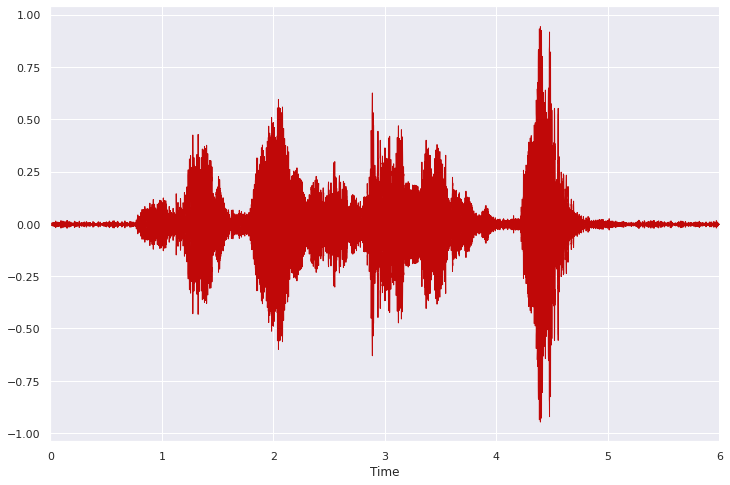

In [11]:
angfile = audio_df[audio_df['Label'] == 'ANG']['Filepath']
angarray = audio_df[audio_df['Label'] == 'ANG']['Arrays']

librosa.display.waveplot(angarray.iloc[0], color='#C00808')
IPython.display.Audio(angfile.iloc[0])

## <h2><span class="label label-default" style="background-color:#804E2D;"> 🤢 DISGUST 🤢 </span></h2>

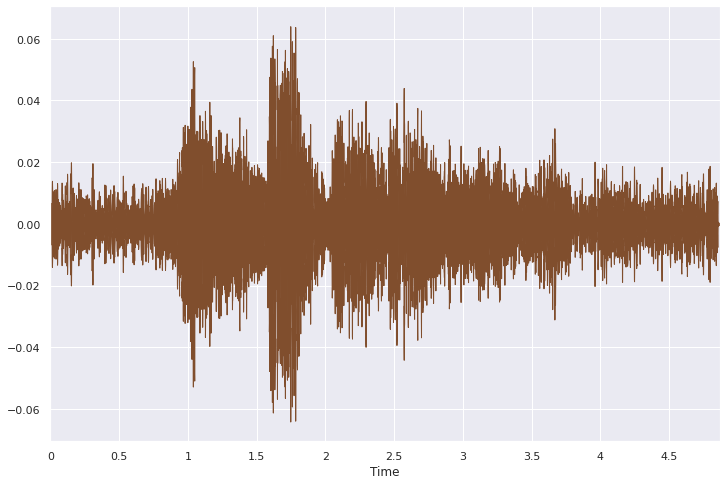

In [12]:
disfile = audio_df[audio_df['Label'] == 'DIS']['Filepath']
disarray = audio_df[audio_df['Label'] == 'DIS']['Arrays']

librosa.display.waveplot(disarray.iloc[0], color='#804E2D')
IPython.display.Audio(disfile.iloc[0])

## <h2><span class="label label-default" style="background-color:#7D55AA;"> 👻 FEAR 👻 </span></h2>

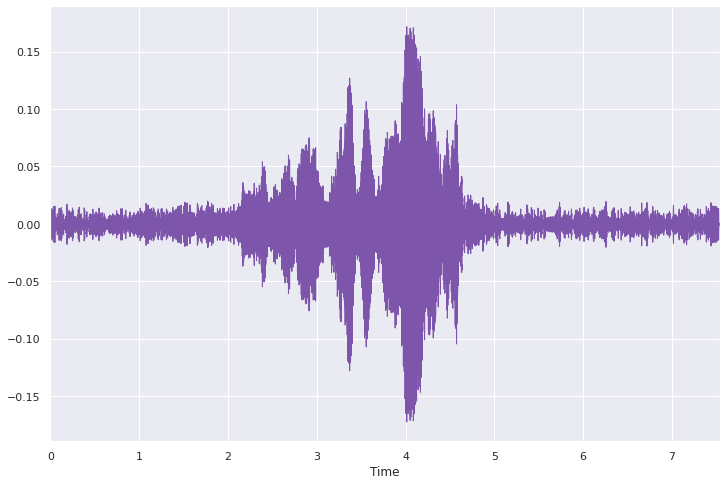

In [13]:
feafile = audio_df[audio_df['Label'] == 'FEA']['Filepath']
feaarray = audio_df[audio_df['Label'] == 'FEA']['Arrays']

librosa.display.waveplot(feaarray.iloc[0], color='#7D55AA')
IPython.display.Audio(feafile.iloc[0])

## <h2><span class="label label-default" style="background-color:#F19C0E;"> 🌈 HAPPINESS 🌈 </span></h2>

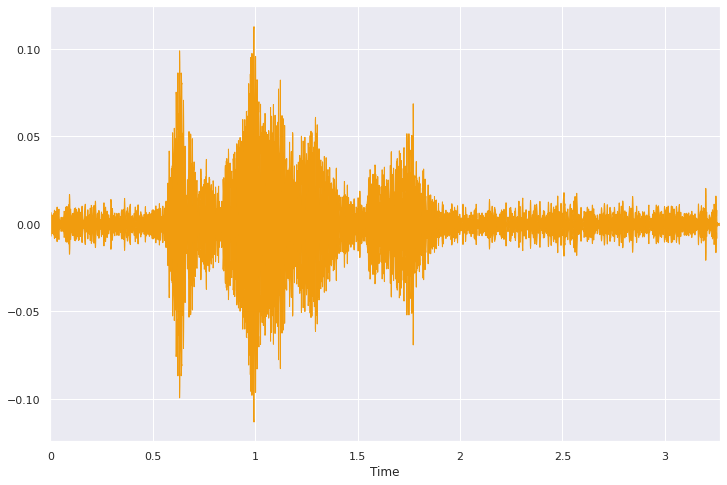

In [14]:
hapfile = audio_df[audio_df['Label'] == 'HAP']['Filepath']
haparray = audio_df[audio_df['Label'] == 'HAP']['Arrays']

librosa.display.waveplot(haparray.iloc[0], color='#F19C0E')
IPython.display.Audio(hapfile.iloc[0])

## <h2><span class="label label-default" style="background-color:#4CB847;"> 😐 NEUTRAL 😐 </span></h2>

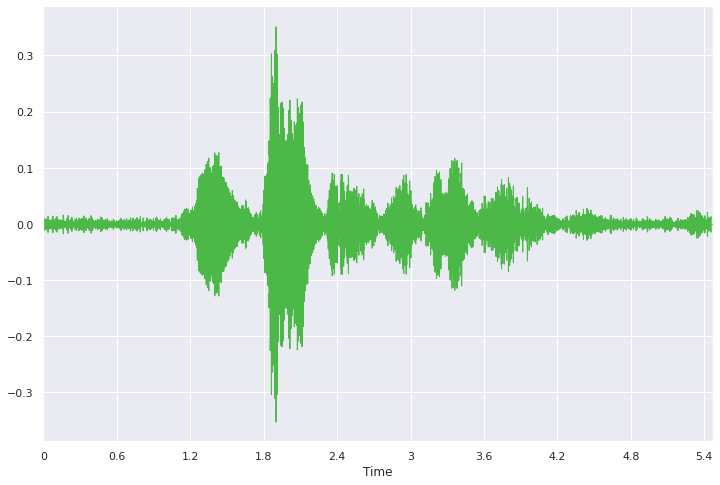

In [15]:
neufile = audio_df[audio_df['Label'] == 'NEU']['Filepath']
neuarray = audio_df[audio_df['Label'] == 'NEU']['Arrays']

librosa.display.waveplot(neuarray.iloc[0], color='#4CB847')
IPython.display.Audio(neufile.iloc[0])

## <h2><span class="label label-default" style="background-color:#478FB8;"> ☔ SADNESS ☔ </span></h2>

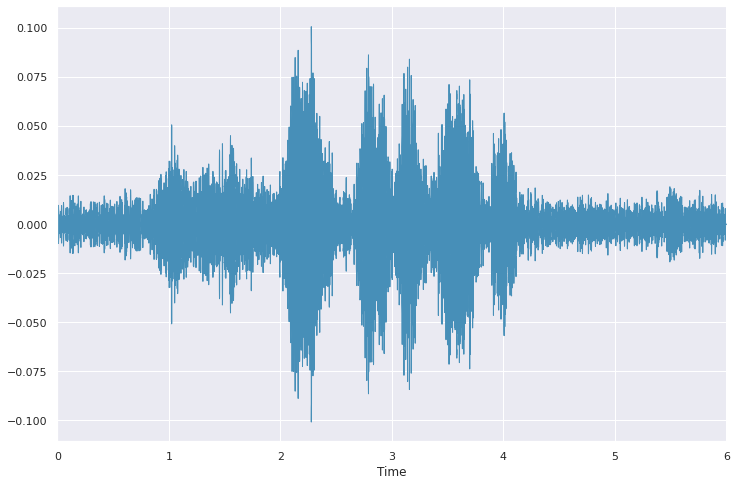

In [16]:
sadfile = audio_df[audio_df['Label'] == 'SAD']['Filepath']
sadarray = audio_df[audio_df['Label'] == 'SAD']['Arrays']

librosa.display.waveplot(sadarray.iloc[0], color='#478FB8')
IPython.display.Audio(sadfile.iloc[0])

Honestly, I would even find it difficult to define the emotions in each of these clips, so it will be interesting to see if we can create a model capable of doing it!

# <h1 id='aug'><span class="label label-default" style="background-color:#4FAEB0; font-size:20px">4. Data Augmentation</span></h1>

In [17]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# <h1 id='features'><span class="label label-default" style="background-color:#4FAEB0; font-size:20px">5. Extracting Features</span></h1>

In [18]:
def extract_features(data):
    # Zero Crossing Rate
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr))

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr, n_fft=200).T, axis=0)
    result = np.hstack((result, chroma_stft))     

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sr, n_fft=200).T, axis=0)
    result = np.hstack((result, mfcc))

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sr, n_fft=200).T, axis=0)
    result = np.hstack((result, mel))
    
    # Tonnetz
    tonnetz = np.mean(librosa.feature.tonnetz(y=data, sr=sr).T, axis=0);
    result = np.hstack((result, tonnetz));
    
    return result

In [19]:
def get_features(data):
    result = []
    
    # without augmentation
    res1 = extract_features(data)
    result.append(res1)
    
    # with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result.append(res2)
    
    # with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sr)
    res3 = extract_features(data_stretch_pitch)
    result.append(res3)
    
    return result

In [20]:
warnings.filterwarnings('ignore')

x = []
y = []
for i in range(len(audio_df)):
    feature=get_features(audio_df['Arrays'].iloc[i]);
    for j in feature:
        x.append(j)
        y.append(audio_df['Label'].iloc[i])

In [21]:
le = LabelEncoder()
y = utils.to_categorical(le.fit_transform(y))
y

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

# <h1 id='traintest'><span class="label label-default" style="background-color:#4FAEB0; font-size:20px">6. Train Test Split</span></h1>

In [22]:
x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y), test_size=0.1)

In [42]:
print((x_train.shape, y_train.shape, x_test.shape, y_test.shape))

((17860, 167, 1), (17860, 6), (4466, 167, 1), (4466, 6))


In [43]:
x_train = np.expand_dims(x_train,axis=2)
x_test = np.expand_dims(x_test,axis=2)

In [44]:
print((x_train.shape, y_train.shape, x_test.shape, y_test.shape))

((17860, 167, 1, 1), (17860, 6), (4466, 167, 1, 1), (4466, 6))


# <h1 id='model'><span class="label label-default" style="background-color:#4FAEB0; font-size:20px">7. Creating Model</span></h1>

In [52]:
model = Sequential()
model.add(Conv1D(128, 3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D((1)))
model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Conv1D(1024, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=0.0005),
             metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_32 (Conv1D)           (None, 165, 128)          512       
_________________________________________________________________
max_pooling1d_32 (MaxPooling (None, 165, 128)          0         
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 163, 256)          98560     
_________________________________________________________________
max_pooling1d_33 (MaxPooling (None, 163, 256)          0         
_________________________________________________________________
conv1d_34 (Conv1D)           (None, 161, 512)          393728    
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, 161, 512)          0         
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 159, 1024)        

In [53]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_test, y_test))

Epoch 1/50
140/140 [==============================] - 12s 79ms/step - loss: 3.7117 - accuracy: 0.2220 - val_loss: 1.5669 - val_accuracy: 0.3343
Epoch 2/50
140/140 [==============================] - 11s 77ms/step - loss: 1.5788 - accuracy: 0.3323 - val_loss: 1.5112 - val_accuracy: 0.3657
Epoch 3/50
140/140 [==============================] - 11s 77ms/step - loss: 1.5232 - accuracy: 0.3662 - val_loss: 1.4919 - val_accuracy: 0.3889
Epoch 4/50
140/140 [==============================] - 11s 77ms/step - loss: 1.5031 - accuracy: 0.3705 - val_loss: 1.4556 - val_accuracy: 0.3858
Epoch 5/50
140/140 [==============================] - 11s 77ms/step - loss: 1.4625 - accuracy: 0.3966 - val_loss: 1.4610 - val_accuracy: 0.3995
Epoch 6/50
140/140 [==============================] - 11s 77ms/step - loss: 1.4491 - accuracy: 0.3975 - val_loss: 1.4578 - val_accuracy: 0.4004
Epoch 7/50
140/140 [==============================] - 11s 77ms/step - loss: 1.4393 - accuracy: 0.4001 - val_loss: 1.4810 - val_accuracy:

# <h1 id='eval'><span class="label label-default" style="background-color:#4FAEB0; font-size:20px">8. Evaluating Model</span></h1>

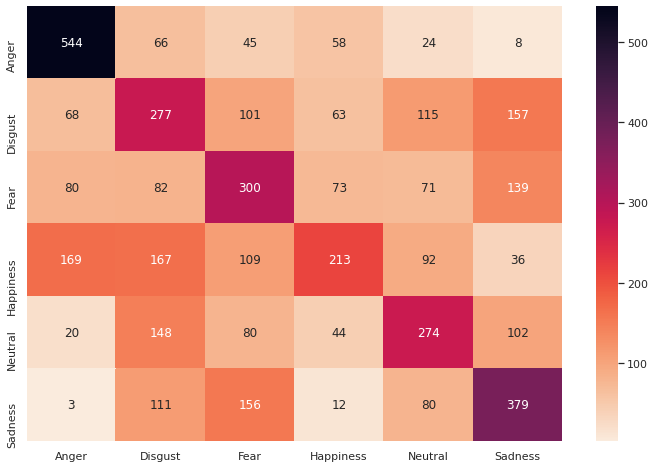

In [54]:
y_pred = model.predict(x_test)
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
ax = sns.heatmap(matrix, annot=True, fmt="d", cmap = 'rocket_r', xticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'], yticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'])